In [1]:
# This program is from the blog post:  
# How to Visualize Filters and Feature Maps in Convolutional Neural Networks
# by Jason Brownlee on May 6, 2019 in Deep Learning for Computer Vision
# https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/
# Modified to use Resnet50
#

from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.applications.resnet import ResNet50

/Users/admin/GitHub/nn/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# load the model
model = ResNet50(weights='imagenet')
# summarize the model
model.summary()

102967424/102967424 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

# Visualize Filters

In [3]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if '_conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

2 conv1_conv (None, 112, 112, 64)
7 conv2_block1_1_conv (None, 56, 56, 64)
10 conv2_block1_2_conv (None, 56, 56, 64)
13 conv2_block1_0_conv (None, 56, 56, 256)
14 conv2_block1_3_conv (None, 56, 56, 256)
19 conv2_block2_1_conv (None, 56, 56, 64)
22 conv2_block2_2_conv (None, 56, 56, 64)
25 conv2_block2_3_conv (None, 56, 56, 256)
29 conv2_block3_1_conv (None, 56, 56, 64)
32 conv2_block3_2_conv (None, 56, 56, 64)
35 conv2_block3_3_conv (None, 56, 56, 256)
39 conv3_block1_1_conv (None, 28, 28, 128)
42 conv3_block1_2_conv (None, 28, 28, 128)
45 conv3_block1_0_conv (None, 28, 28, 512)
46 conv3_block1_3_conv (None, 28, 28, 512)
51 conv3_block2_1_conv (None, 28, 28, 128)
54 conv3_block2_2_conv (None, 28, 28, 128)
57 conv3_block2_3_conv (None, 28, 28, 512)
61 conv3_block3_1_conv (None, 28, 28, 128)
64 conv3_block3_2_conv (None, 28, 28, 128)
67 conv3_block3_3_conv (None, 28, 28, 512)
71 conv3_block4_1_conv (None, 28, 28, 128)
74 conv3_block4_2_conv (None, 28, 28, 128)
77 conv3_block4_3_conv (Non

In [4]:
# retrieve weights from the second hidden layer, which is the first conv layer
filters, biases = model.layers[2].get_weights()

In [5]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [6]:
print(filters[:,:,0,0])

[[0.5084364  0.50111794 0.49944398 0.48965383 0.44934735 0.45346233
  0.50137657]
 [0.49370375 0.5059883  0.54368085 0.5535243  0.47414124 0.43019524
  0.4767249 ]
 [0.46791872 0.4400856  0.50243026 0.6222336  0.57189375 0.4224705
  0.41907856]
 [0.4807777  0.43028164 0.39350393 0.557139   0.68425983 0.5601721
  0.47703764]
 [0.50474846 0.45411977 0.35483217 0.37443817 0.5268783  0.548603
  0.5147657 ]
 [0.5186172  0.5213018  0.45400012 0.3955243  0.47260797 0.5120497
  0.5061095 ]
 [0.49853176 0.51350975 0.49088162 0.44398895 0.47541067 0.4962661
  0.49137807]]


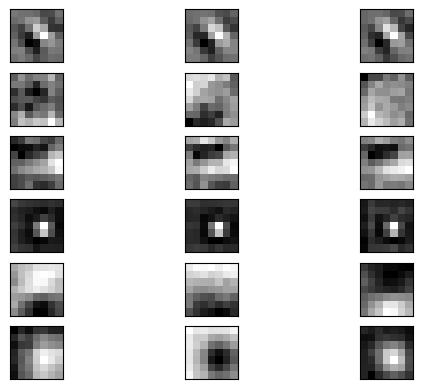

In [7]:
# plot first six filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

In [8]:
print(f_min, f_max)

-0.6710244 0.70432377


In [9]:
# redefine model to output right after the second convolutional layer
# this is layer #7
model = Model(inputs=model.inputs, outputs=model.layers[7].output)
# this model is much smaller than the VGG16 model, but still uses 
# the same weights (filters) in the first convolutional layer as 
# the VGG16 model.
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)       0         
                                                                 
 conv1_conv (Conv2D)         (None, 112, 112, 64)      9472      
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)      256       
 on)                                                             
                                                                 
 conv1_relu (Activation)     (None, 112, 112, 64)      0         
                                                                 
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)      0         
                                                             

In [11]:
# load the image with the required shape
#drive.mount('/content/drive')
img = load_img('stopsign.jpg', target_size=(224, 224))
# convert the image to an array
# the image PIL object needs to be converted to a NumPy array of 
# pixel data and expanded from a 3D array to a 4D array with the 
# dimensions of [samples, rows, cols, channels], where we only 
# have one sample.
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the resnet)
img = preprocess_input(img)

In [12]:
# get feature map for first hidden layer
feature_maps = model.predict(img)

1/1 [==============================] - 0s 129ms/step


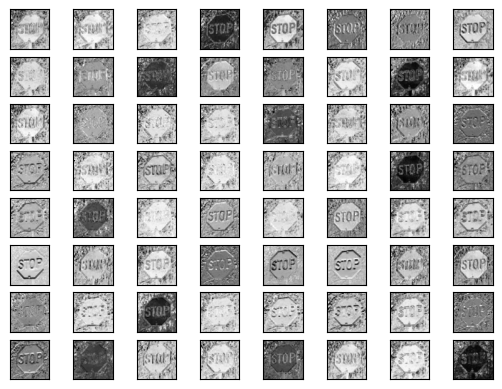

In [13]:
# The result will be a feature map with 56x56x64. 
# We can plot all 64 two-dimensional images as an 8×8 square of images.
# plot the output from each block
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

(a) The input shape is: (224,224,3)
(b) In the conv1_pad (ZeroPadding2D) layer, the zero-padding P = 3
(c) The number of kernels(filter) in the first convolutional layer conv1_conv (Conv2D) is: 64
(d) Find the stride S and the size F of each filter in the layer conv1_conv (Conv2D): 